<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295         

<Axes: xlabel='model_year', ylabel='Density'>

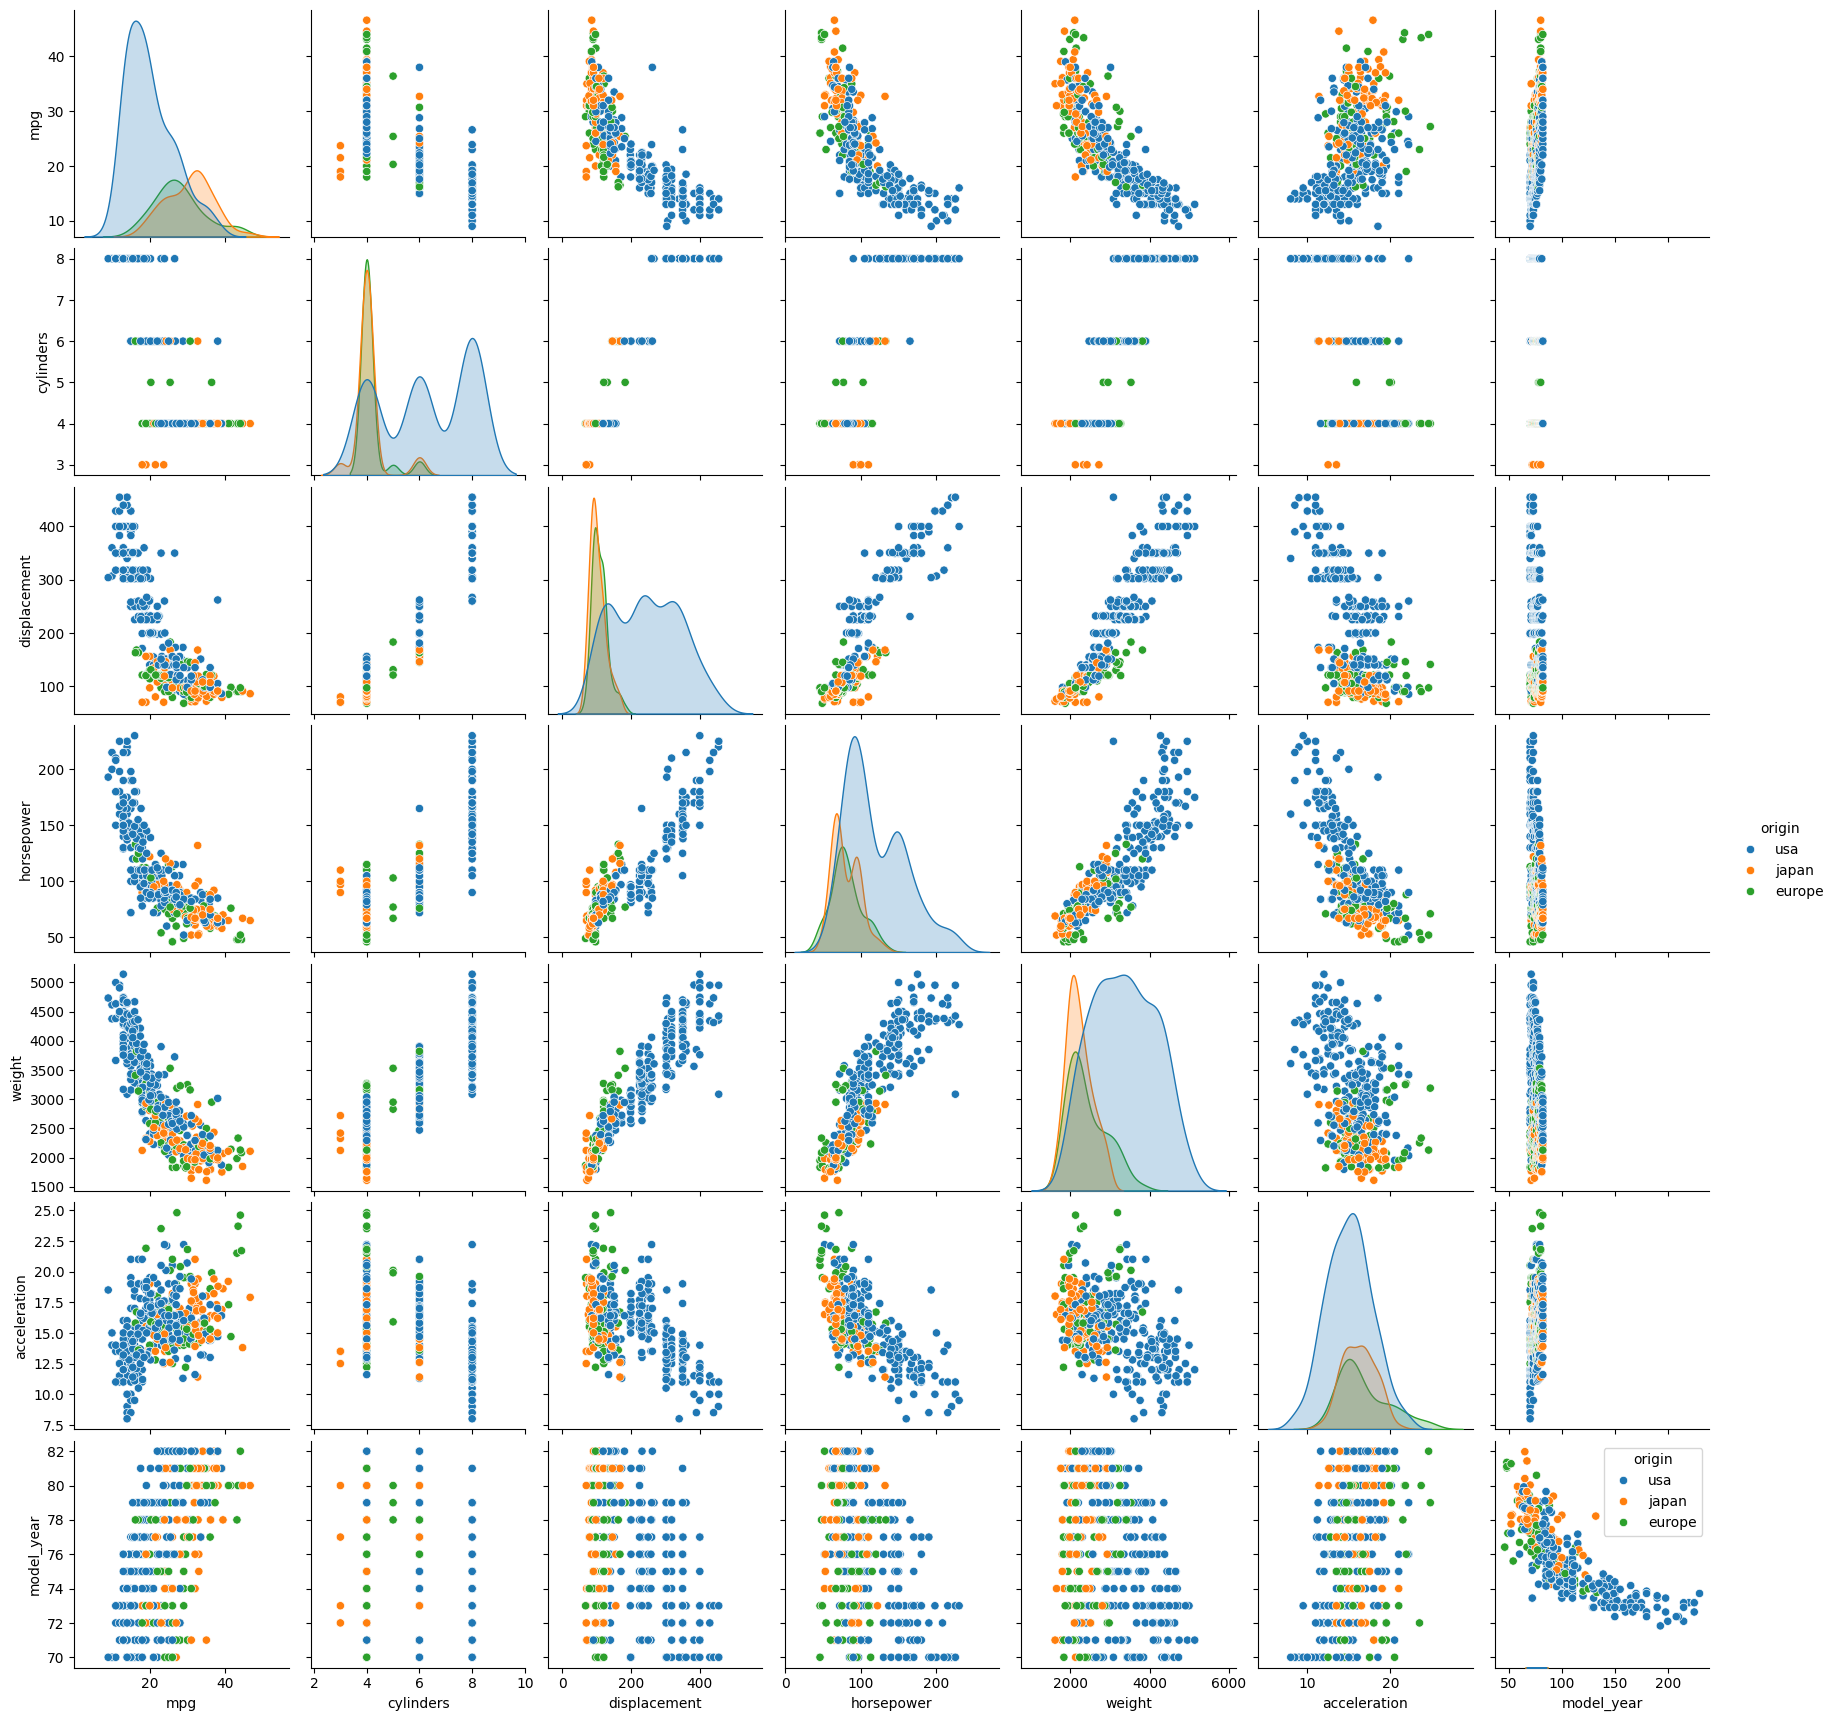

In [ ]:
import seaborn as sns

# Cargar el dataset
mpg = sns.load_dataset("mpg")
print(mpg.head())
print(mpg.tail())

# Visualizar los datos con un gráfico de dispersión, considerando todas las combinaciones de variables
sns.pairplot(mpg, hue="origin")

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<Axes: >

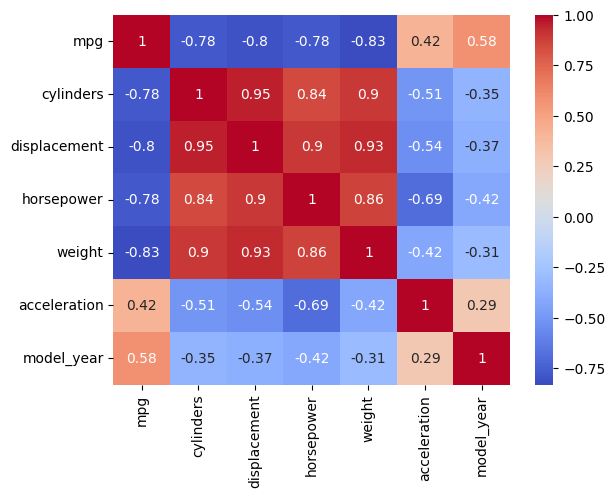

In [ ]:
# Incluir un gráfico de correlación entre las variables. En este caso, un mapa de calor
correlation_matrix = mpg.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

3) (1 punto) Entrenar un modelo de regresion lineal


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir los datos en conjuntos de entrenamiento y prueba
X = mpg[["horsepower"]].dropna() # Eliminamos filas con valores nulos
y = mpg.loc[X.index, "mpg"] # Aseguramos que y tenga la misma longitud que X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal. Se intenta predecir el consumo en millas por galón (mpg) en función de la potencia del motor (horsepower)
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 22.153237123863413
R^2 Score: 0.5659681822256185


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


Las variables con la mayor correlación son: cylinders y displacement


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


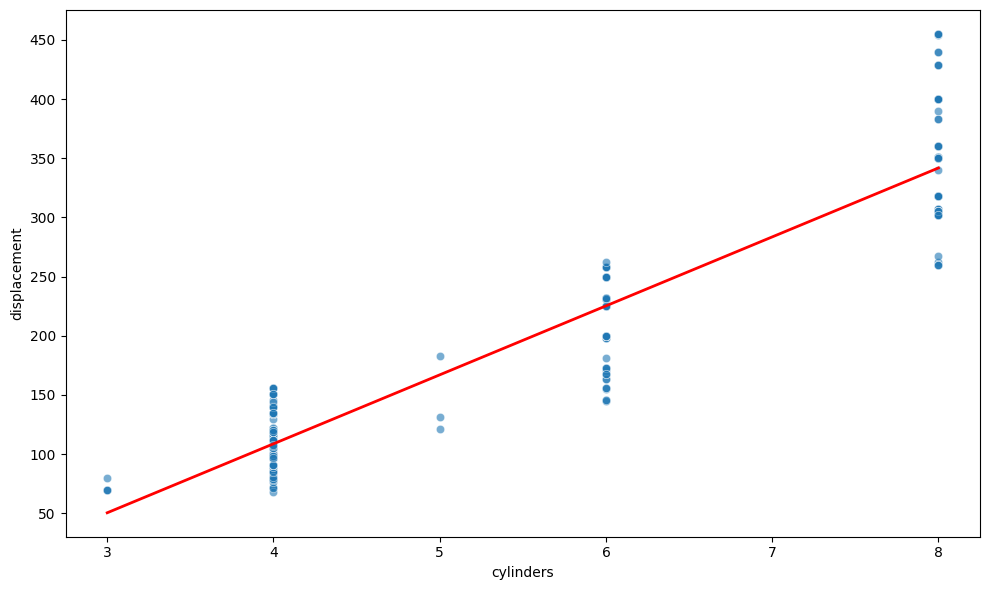

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

corr_df = correlation_matrix.abs().unstack() # Obtener los valores absolutos de la matriz de correlación
corr_df = corr_df[corr_df < 1]  # Eliminar la diagonal de la matriz de correlación
highest_corr = corr_df.sort_values(ascending=False).index[0] 
var1, var2 = highest_corr 
print(f"Las variables con la mayor correlación son: {var1} y {var2}")

# Preparar los datos para el modelo de regresión lineal -> se desea obtener la línea
X_corr = mpg[[var1]].dropna()
y_corr = mpg.loc[X_corr.index, var2]

# Crear y entrenar el modelo de regresión lineal
modelo_corr = LinearRegression()
modelo_corr.fit(X_corr, y_corr)

# Crear un rango de valores para la variable X
x_range = np.linspace(X_corr[var1].min(), X_corr[var1].max(), 100).reshape(-1, 1)
# Predecir los valores de Y usando el modelo
y_pred = modelo_corr.predict(x_range)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=var1, y=var2, data=mpg, alpha=0.6)

# Añadir la línea de regresión al gráfico
plt.plot(x_range, y_pred, color='red', linewidth=2)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.